In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet.AutoUnet import *
from NN_library.AutoUnet.train_AutoUnet import *
%load_ext autoreload
%autoreload 2

Using device: cuda


In [2]:
data = dataset_nonuniform()
loaders = get_loaders(data, 16)
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)

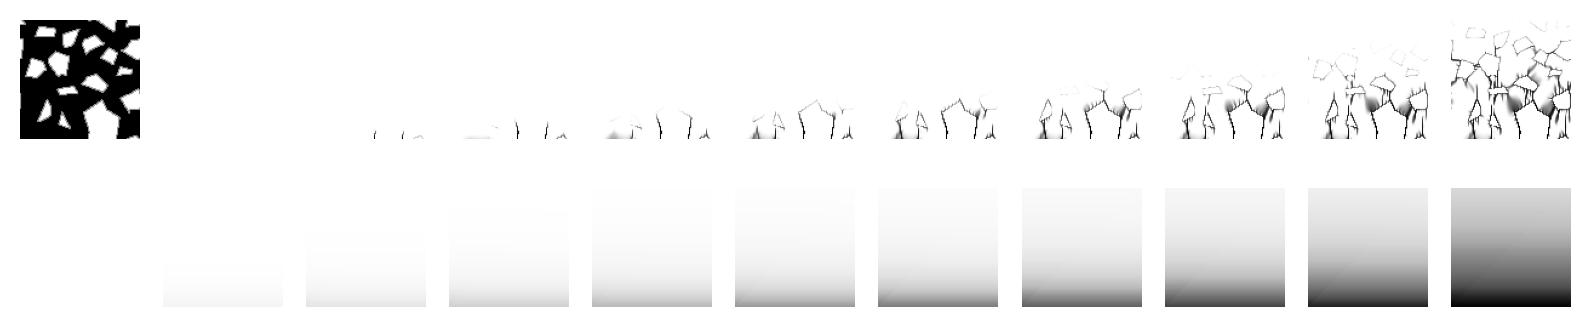

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=11, figsize=(10, 2), dpi=200)
for i in range(11):
    axs[0,i].imshow(damage[i], cmap='Greys')
    axs[0,i].set_axis_off()
    axs[1,i].imshow(imp_shrinkage[i] / (-0.001), cmap='Greys', vmin=0, vmax=1)
    axs[1,i].set_axis_off()
axs[0,0].imshow(geometry[0], cmap='Greys')
axs[0,0].set_axis_off()

In [4]:
name = 'NN_library/AutoUnet/AutoUnet'
args = {'lr' : 0.00001, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [5]:
unet = AutoUNet()

In [6]:
torch.cuda.empty_cache() 

In [7]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 7697345


In [8]:
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet_uniform', args)

In [8]:
unet = load_network(unet, name + '_19', args)

In [9]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  671.7165416963
Epoch: 0 batch: 100 mean train loss:  628.3022453713
Epoch: 0 batch: 200 mean train loss:  590.2423458712
Epoch: 0 batch: 300 mean train loss:  711.5523028933
Epoch: 0 batch: 400 mean train loss:  634.3203970855
Epoch: 0 batch: 500 mean train loss:  579.9715451277
Epoch: 0 batch: 600 mean train loss:  642.6348890476
Epoch: 0 batch: 700 mean train loss:  719.3185243304
Epoch: 0 mean train loss:  651.9838474784 mean val. rec. loss:  673.0485229492
Epoch: 1 batch: 0 mean train loss:  639.5842775890
Epoch: 1 batch: 100 mean train loss:  600.9802824687
Epoch: 1 batch: 200 mean train loss:  591.5267919949
Epoch: 1 batch: 300 mean train loss:  614.3353401544
Epoch: 1 batch: 400 mean train loss:  646.7773288302
Epoch: 1 batch: 500 mean train loss:  659.2033372195
Epoch: 1 batch: 600 mean train loss:  619.5159938931
Epoch: 1 batch: 700 mean train loss:  659.1719186604
Epoch: 1 mean train loss:  650.3918877780 mean val. rec. loss:  669.570007324

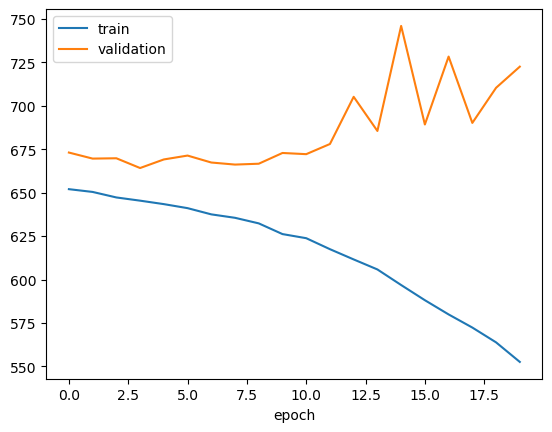

In [10]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

## Train with Convnet

In [3]:
from NN_library.ConvNet.ConvNet_uniform import *
from NN_library.ConvNet.train_ConvNet import *
name = 'NN_library/AutoUnet/AutoUnet_w_Conv_new_norm'
conv_name = 'NN_library/ConvNet/Conv_w_AutoUnet_new_norm'

Using device: cuda


In [4]:
args = {'lr' : 0.000001, 'epochs' : 20, 'dev' : dev, 'name' : name, 'conv_name' : conv_name}

In [5]:
unet = AutoUNet()
convnet = ConvNet(16)

In [6]:
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet_new_pt_norm', args)

In [7]:
convnet = load_network(convnet, 'NN_library/ConvNet/ConvNet_new_norm', args)

In [11]:
convnet = load_network(convnet, conv_name + '_19', args)

In [12]:
unet = load_network(unet, name + '_19', args)  

In [8]:
losses_train, losses_val = train_w_Conv(unet, convnet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  0.2180334940
Epoch: 0 batch: 100 mean train loss:  0.1948171209
Epoch: 0 batch: 200 mean train loss:  0.1573901025
Epoch: 0 batch: 300 mean train loss:  0.1357491214
Epoch: 0 batch: 400 mean train loss:  0.1480008778
Epoch: 0 batch: 500 mean train loss:  0.1637616372
Epoch: 0 batch: 600 mean train loss:  0.1454190619
Epoch: 0 batch: 700 mean train loss:  0.1438969141
Epoch: 0 mean train loss:  0.1554774208 mean val. rec. loss:  0.1098317355
Epoch: 1 batch: 0 mean train loss:  0.1489758086
Epoch: 1 batch: 100 mean train loss:  0.1563940614
Epoch: 1 batch: 200 mean train loss:  0.1577298634
Epoch: 1 batch: 300 mean train loss:  0.1280619935
Epoch: 1 batch: 400 mean train loss:  0.1495310240
Epoch: 1 batch: 500 mean train loss:  0.1612816788
Epoch: 1 batch: 600 mean train loss:  0.1530179325
Epoch: 1 batch: 700 mean train loss:  0.1470336628
Epoch: 1 mean train loss:  0.1512650517 mean val. rec. loss:  0.1072374508
Epoch: 2 batch: 0 mean train loss:  0.

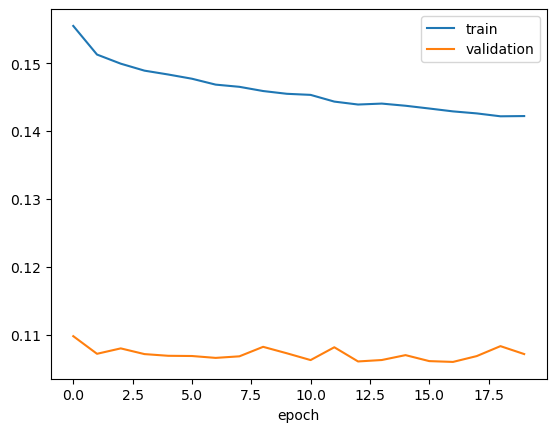

In [9]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])